In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Simulating a Random Walk

In [6]:
n = 252
x = np.cumsum(np.random.normal(size=n))

In [7]:
s = pd.Series(x)

<AxesSubplot:>

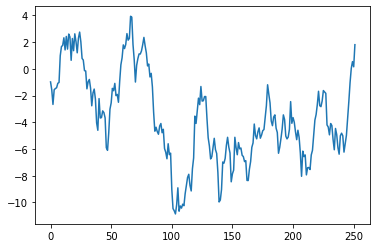

In [8]:
s.plot()

## Spurious Regression

Let's estimate the following:

$$
y_{t} = \alpha + \beta z_{t} + \epsilon
$$

<br>

In [9]:
z = np.cumsum(np.random.normal(size=n))

In [10]:
α = 2.5
β = 7.5
ϵ = np.random.normal(size=n)

In [16]:
y = np.zeros(n)
#y[0] = np.log(100)

for t in range(1, n):
    y[t] = α + β * z[t] + ϵ[t]

In [17]:
ys = pd.Series(y)

<AxesSubplot:>

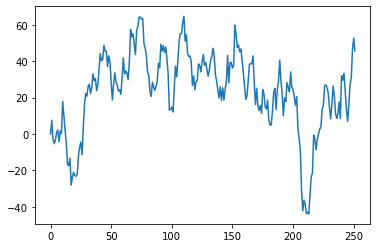

In [18]:
ys.plot()

## Regression with Two Separate Unit-Root Nonstationary Processes

In [26]:
y = np.cumsum(np.random.normal(size=n))
x = np.cumsum(np.random.normal(size=n))
res = sm.OLS(y,x).fit()
#res = model.fit()

In [27]:
res.params

array([-1.31244563])

In [30]:
M = 100_000
betas = np.zeros(M)

for m in range(M):
    y = np.cumsum(np.random.normal(size=n))
    x = np.cumsum(np.random.normal(size=n))
    results = sm.OLS(y,x).fit()
    betas[m] = results.params[0]

(array([1.3000e+01, 1.5700e+02, 1.5020e+03, 1.5413e+04, 6.0506e+04,
        2.0095e+04, 2.0700e+03, 2.2100e+02, 2.0000e+01, 3.0000e+00]),
 array([-6.29684598, -4.91619901, -3.53555204, -2.15490508, -0.77425811,
         0.60638886,  1.98703582,  3.36768279,  4.74832976,  6.12897672,
         7.50962369]),
 <BarContainer object of 10 artists>)

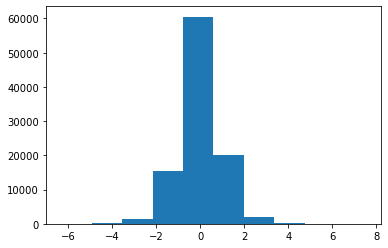

In [31]:
plt.hist(betas)